In [65]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup

import time

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
url= 'https://www.linkedin.com/jobs'

In [3]:
driver = webdriver.Chrome()

In [4]:
driver.get(url)

In [5]:
job_title = driver.find_element_by_xpath('//*[@id="JOBS"]/section[1]/input')

In [6]:
job_title.send_keys('data scientist')

In [7]:
location = driver.find_element_by_xpath('//*[@id="JOBS"]/section[2]/input')

In [8]:
location.send_keys('New York, NY')

In [9]:
location.clear()

In [10]:
location.send_keys('New York, NY')

In [12]:
location.send_keys(Keys.ENTER)

In [13]:
driver.execute_script('return document.body.scrollHeight')

11104

In [16]:
driver.execute_script('window.scrollTo(0, 11104)')

In [17]:
driver.execute_script('return document.body.scrollHeight')

14504

In [18]:
driver.execute_script('window.scrollTo(0, 11104)')

In [21]:
initial_height = driver.execute_script('return document.body.scrollHeight')

while True:
    
    driver.execute_script('window.scrollTo(0, document.body.scrollHeight)')
                          
    time.sleep(5)
                          
    new_height = driver.execute_script('return document.body.scrollHeight')
    
    if new_height == initial_height:
        break
    initial_height = new_height

In [22]:
more_jobs = driver.find_element_by_xpath('//*[@id="main-content"]/div/section/button')

In [23]:
more_jobs.click()

In [24]:
initial_height = driver.execute_script('return document.body.scrollHeight')

while True:
    
    more_jobs.click()
                          
    time.sleep(5)
                          
    new_height = driver.execute_script('return document.body.scrollHeight')
    
    if new_height == initial_height:
        break
    initial_height = new_height

In [26]:
my_html = driver.page_source

In [27]:
soup = BeautifulSoup(my_html, 'html.parser')

In [29]:
# job title
job_1 = soup.find('div', class_ = 'result-card__contents job-result-card__contents')

In [33]:
job_1.find('h3', class_ = 'result-card__title job-result-card__title').text.strip()

'Data Scientist'

In [36]:
# company 
job_1.find('a').text.strip()

'TBWA\\Chiat\\Day'

In [38]:
# location
job_1.find('span', class_ = 'job-result-card__location').text.strip()

'New York, United States'

In [42]:
# posting date
job_1.find('time')['datetime']

'2020-05-26'

In [43]:
all_jobs = soup.findAll('div', class_ = 'result-card__contents job-result-card__contents')

In [44]:
len(all_jobs)

1000

In [59]:
job_title = []
company = []
location = []
posting_date = []


for count, job in enumerate(all_jobs):
    jt = job.find('h3', class_ = 'result-card__title job-result-card__title').text.strip()
    job_title.append(jt)
    
    # company 
    comp = job.find('h4').text.strip()
    company.append(comp)
    
    # location
    loca = job.find('span', class_ = 'job-result-card__location').text.strip()
    location.append(loca)
    
    # posting_date 
    post_date = job.find('time')['datetime']
    posting_date.append(post_date)

In [61]:
df = pd.DataFrame({'job_title': job_title,
                  'company': company,
                  'location': location,
                  'posting_date': posting_date})

In [63]:
df['posting_date'] = pd.to_datetime(df['posting_date'])

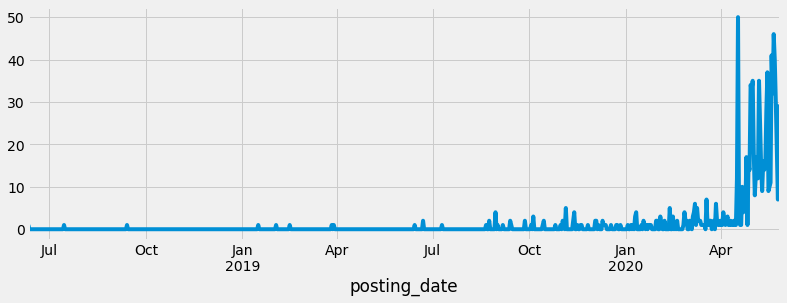

In [68]:
with plt.style.context('fivethirtyeight'):
    df.set_index('posting_date').resample('D')['company'].count().plot(kind = 'line', figsize = (12, 4))

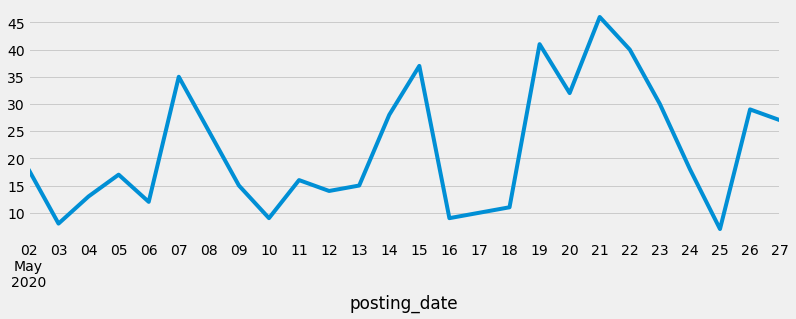

In [72]:
with plt.style.context('fivethirtyeight'):
    df[df['posting_date'] > '05/01/2020'].set_index('posting_date').resample('D')['company'].count().plot(kind = 'line', figsize = (12, 4))

In [74]:
df[df['posting_date'] > '05/01/2020'].set_index('posting_date').resample('D')['company'].count()

posting_date
2020-05-02    18
2020-05-03     8
2020-05-04    13
2020-05-05    17
2020-05-06    12
2020-05-07    35
2020-05-08    25
2020-05-09    15
2020-05-10     9
2020-05-11    16
2020-05-12    14
2020-05-13    15
2020-05-14    28
2020-05-15    37
2020-05-16     9
2020-05-17    10
2020-05-18    11
2020-05-19    41
2020-05-20    32
2020-05-21    46
2020-05-22    40
2020-05-23    30
2020-05-24    18
2020-05-25     7
2020-05-26    29
2020-05-27    27
Freq: D, Name: company, dtype: int64

In [76]:
df[df['posting_date'] == '05/21/2020']

,job_title,company,location,posting_date
4,Data Scientist,Voice,New York City Metropolitan Area,2020-05-21
8,"Data Scientist, Analytics",Facebook,"New York, NY",2020-05-21
21,Energy Tech Startup - Data Scientist,Huxley,"New York, NY",2020-05-21
22,Data Scientist - Analytics Team,Point72,"New York, NY",2020-05-21
29,Energy Tech Startup - Data Scientist,Huxley,"New York, New York, United States",2020-05-21
33,Data Scientist,Openly,New York City Metropolitan Area,2020-05-21
42,Business Data Analyst,Oscar Health,"New York, New York, United States",2020-05-21
69,Data Scientist,USI Insurance Services,"Valhalla, New York, United States",2020-05-21
89,"Data Scientist, Junior",Booz Allen Hamilton,"Rome, New York, United States",2020-05-21
112,Data Scientist,USI Insurance Services,"Valhalla, New York, United States",2020-05-21


In [77]:
links = driver.find_elements_by_class_name('result-card__full-card-link')

In [78]:
links[0]

<selenium.webdriver.remote.webelement.WebElement (session="0e0612168c01ca169b011a5988374ab7", element="0.02682904308510281-2")>

In [79]:
links[1].click()

In [80]:
# job title
my_html_job = driver.page_source
soup = BeautifulSoup(my_html_job, 'html.parser')

In [83]:
soup.find('h2', class_ = 'topcard__title').text.strip()

'Data Scientist'

In [86]:
# company 
soup.find('span', class_ = 'topcard__flavor').text.strip()

'Hedge Fund Talent'

In [88]:
# location
soup.find('span', class_ = 'topcard__flavor topcard__flavor--bullet').text.strip()

'New York, NY'

In [91]:
# applicants 
soup.find('span', class_ = 'topcard__flavor--metadata topcard__flavor--bullet num-applicants__caption').text.strip()

'92 applicants'

In [93]:
# senority level 
soup.find('span', class_ = 'job-criteria__text job-criteria__text--criteria').text.strip()

'Mid-Senior level'

In [95]:
# description
soup.find('div', class_ = 'description__text description__text--rich').text

"Are you a Data Scientist that is interested in working with one of world's leading Quantitative Hedge Funds?  Are you a Data Scientist that would enjoy working with a cutting-edge  financial and engineering teams and to expand their data science and  machine learning capabilities?   This New York City based leading Quantitative Hedge Fund  seeks a talented Data Scientist that will work closely with the  finance, operations, as well as other investment teams across the firm.  As the Data Scientist, you will: Manage large amounts of complex data in Python and running quantitative queries. Identify timely and unique data sets, diving deep into a diverse set  of data domains as well as visualizing and exploring underlying data  drivers Build statistical analysis and financial modeling techniques to large data sets.  What you need: Master's or PhD degree from a competitive university in a quantitative  field such as statistics, mathematics, operational research, computer  science, finance 

In [ ]:
my_rows = []

error_rows = []

for counter, link in enumerate(links):
    if (counter > 0) & (counter % 25 == 0):
        print(counter)
    try:
        # click on link
        link.click()
        
        # grab html
        my_html_job = driver.page_source
        soup = BeautifulSoup(my_html_job, 'html.parser')
        
        # job title
        jt = soup.find('h2', class_ = 'topcard__title').text.strip()
        
        # company 
        comp = soup.find('span', class_ = 'topcard__flavor').text.strip()
        
        # location
        loca = soup.find('span', class_ = 'topcard__flavor topcard__flavor--bullet').text.strip()
        
        # applicants
        applica = soup.find('span', class_ = 'topcard__flavor--metadata topcard__flavor--bullet num-applicants__caption').text.strip()
        
        # sensority level
        senor = soup.find('span', class_ = 'job-criteria__text job-criteria__text--criteria').text.strip()
        
        # description
        desc = soup.find('div', class_ = 'description__text description__text--rich').text
        
        job_dict = {'job_title': jt,
                   'company': comp,
                   'location': loca,
                    'applicants': applica,
                    'senority': senor,
                    'description': desc
                   }
        my_rows.append(job_dict)
        
    except:
        error_rows.append(counter)

25
50
75
100
125
150
175
200
225
250
275
300
325
350
375
400
425
450
475
500
525
550
575
600
625
650
